# Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)

## Set Up + Info

For this notebook, I decided to the following analysis of the State of the Union data set:

- Topic evolution over time - see https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization

In which I took inspiration from the Dynamic Topic Modeling and decided to use the State of the Union dataset and BERTopic model to analyze the topics of the speeches and plot it against time, to see which topics were relevant in each time period. 

This notebook is split into 4 sections:

1) Set Up + Info
2) Dynamic Topic Modeling
3) Hierarchical Topic Modeling
4) Topic Distribution

We first need to import the relevant libraries to conduct our analyses, the IPython-sotu kernel used already has most of the dependencies installed, so we only need to import the following libraries below.

In [7]:
# imports
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import re
import tqdm

Once we have completed that step, we then create a Pandas Dataframe to read the data, and for consistency purposes, it is good practice to view the structure of the dataframe and what columns we are dealing with. In this case, we will be dealing with ``Year`` and ``Text`` mainly.

In [12]:
sou = pd.read_csv("data/SOTU.csv")
docs = sou['Text'].to_list()
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


After inspecting the data, we are now ready to train out BERTopic model, which we set with ``min_topic_size`` to 3, and then use ``fit_transform()`` on our "docs" (the ``Text`` column in the pandas dataframe). This is how the model can learn and classify into general categories. Once we achieve that, we then use a vectorized model via ``CountVectorizer`` and use the ``update_topics()`` method in our BERTopic model to update the topics (since we want to remove stop words to remove noise).

In [4]:
# train the model - this takes about 30 seconds
topic_model = BERTopic(min_topic_size=3)
topics, probs = topic_model.fit_transform(docs)
# remove stop words from the topics
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3), min_df=10)
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

## Dynamic Topic Modeling

The first visualization as part of our advanced analysis will be Dynamic Topic Modeling (DTM), which basically takes the SOTU dataset, specifically "Year" and "Text" to create the visualization. To do this, we take the ``topic_model`` BERTopic model and use the method ``.topics_over_time()`` which has the parameters (used in this notebook):

- **Tuning**: either *global tuning* or *evolutionary tuning* (default set to ``True``) which means that the representation are influenced by the global representations
- **Bins**: You may have far too many timestamps, which can lead to overplotting, so it is recommended to keep the number of bins less than **50** so that the timestamps would be put into equal size bins

In the following visualization,  we plot the top **5** topics by using the ``.visualize_topics_over_time()`` method and have nr_bins set to **20** for more sophistication of the smaller trends, which disappear with small amount of bins.

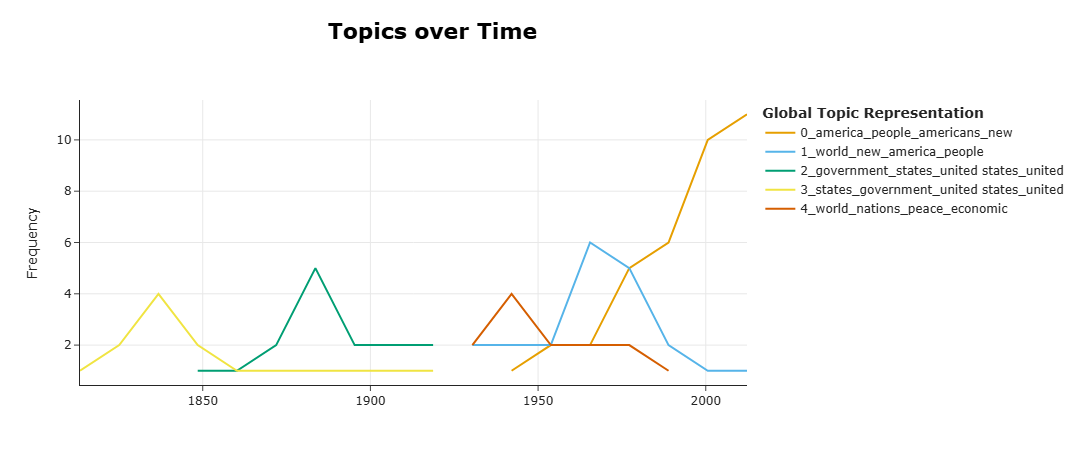

In [33]:
timestamps = sou["Year"]
topics_over_time = topic_model.topics_over_time(docs, timestamps, nr_bins=20)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics = 5)

## Hierarchical Topic Modeling

Our second visualization as part of our advanced analysis is Hierarchical Topic Modeling, which es

100%|██████████| 22/22 [00:00<00:00, 258.56it/s]


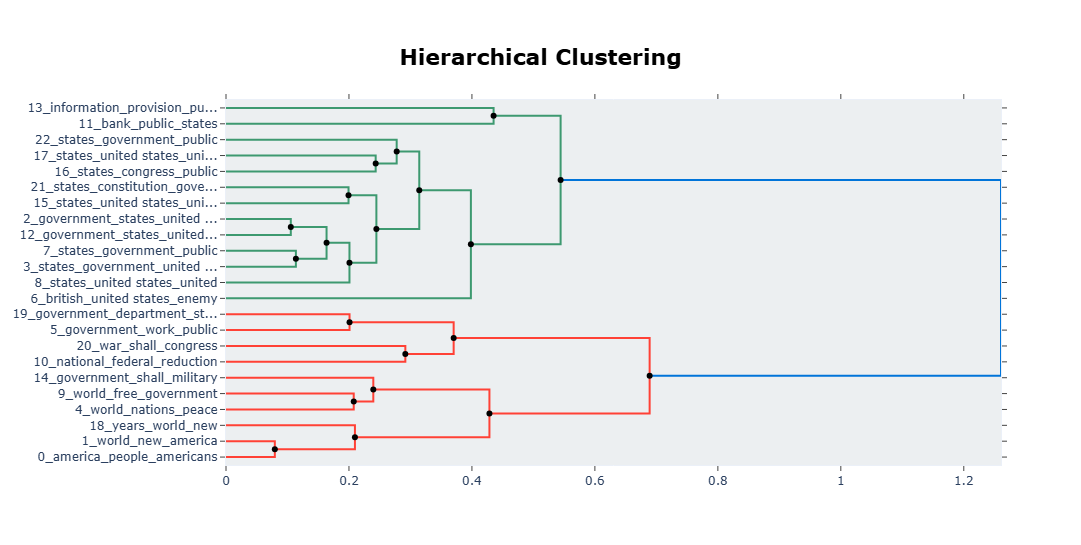

In [18]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [20]:
topic_distr, _ = topic_model.approximate_distribution(docs)
topic_model.visualize_distribution(topic_distr[1])